# Car Accident Severity Resulting in Fatalities #

## Introduction ##
'Since March 2020 the corona-virus pandemic a _shelter-in-place_ order has minimized vehicles on thr roadways.  Instead of the minimal vehicles on the roadways, providing a safer  enviroment and insurance claim activity [cost], the opposite has occured.  Between the National Highway Safety Admininstration (NHTSA) and Insurance Service Office (ISO), car accident severity is rising at an alarming pace.  How can this be correct!  Basic logical deduction: _Less vehicle traffic produces less traffic accidents, especially server accidents._

In today's news, one health spokeman announced that the corona-virus pandemic's United States _shelter-in-place_ strategy could last until the end of 2021!  This is a study using Machine Learning alogrithms to __predict__ 07/2020 to 06/2021 fatalities based on a prior 12 months of data.'

## Business Problem ##
'Annually, insurance companies perform a _rate-making_ process to set premium rates, also known as _insurance pricing_. A rate is the price unit of insurance for each exposure unit. Vehicle coverage as property and casualty insurance, the exposure unit is typically equal to \\$100 of property value, and liability is measured in \\$1000 units. This study is focused on liability.'

'Key _rate-making_ personnel are insurance underwriters and actuaries.'

'The _rate-making_ process workflow is as follows:
> 1. Identify the car accidents with fatalities data points
> 2. Categorize data points: car fatalities, timing and volume
> 3. Select Machine Learning Predictive Alogritm
> 4. Perform Parameter Tuning and Averaging
> 5. Create 2021 rates

 



## Data Section ##

### Resources ###

> __NHTSA: Early Estimates of Motoer Vehicle Fatalities, 2019__
>> - Fatalities Quarterly data with percentage of change
>> - 10-Regional counts and percentage of change<br>

> __Injury Facts NSC: Traffic Volume/Averages__
>> - Volume of Miles Driven
>> - Number deaths
>> - Number of Fatal Crashes<br>

> __NSC January 2019 and June 2020__
>> - Total U.S. Motor Vehicle Deaths
>>>  - comparisons for 2020, 2019, 2018
>>>  - percentage change
>>>>   - 2019 to 2020
>>>>   - 2018 to 2020

Using supervised learning to identify data patterns in creating __2021__ fatalities predictions based on above mentioned analysis.

## Report Analysis

In [1]:
# Preprocessing

#### The Study ####
>1. Prepare data (3 combine data points featuring years, months, miles travelled and fatalities).
>2. Applying a different algorithm to the __fatalitystudy__ dataset.
>3. Tune algorithms to optimize the models.
>4. Evaluate models based on their accuracy.

In [33]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [34]:
# Load Fatality Study from CSV File 

df = pd.read_csv('fatalitystudy.csv',delimiter=';')
df.head()

,Year,1Q Count,1Q Change,1Q FR,2Q Count,2Q Change,2Q FR,3Q Count,3Q Change,3Q FR,4Q Count,4Q Change,4Q FR,YR CT,YR CHG,YR FR
0,2009,7552,-10.7,1.09,8975,-4.9,1.16,9104,-8.5,1.17,8252,-13.9,1.12,33883,-9.5,1.15
1,2010,6755,-10.6,0.98,8522,-5.0,1.09,9226,1.3,1.18,8496,3.0,1.14,32999,-2.6,1.11
2,2011,6726,-0.4,0.98,8227,-3.5,1.09,8984,-2.6,1.18,8542,0.5,1.17,32479,-1.6,1.10
3,2012,7521,11.8,1.08,8612,4.7,1.12,9171,2.1,1.12,8478,-0.7,1.16,33782,4.0,1.14
4,2013,7166,-4.7,1.04,8207,-4.7,1.07,9024,-1.6,1.17,8496,0.2,1.15,32893,-2.6,1.10


In [35]:
df['YR CHG'].value_counts()

-2.6    2
-1.2    1
-2.4    1
 8.4    1
-1.6    1
-0.9    1
 6.5    1
-0.5    1
 4.0    1
-9.5    1
Name: YR CHG, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A16107EB08>]],
      dtype=object)

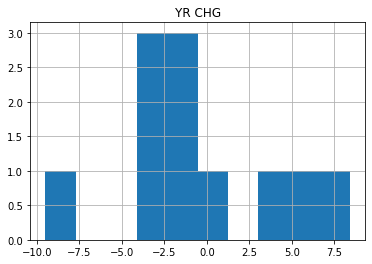

In [36]:
df.hist(column='YR CHG', bins=10)

In [37]:
# Selection of Features

df.columns


Index(['Year', '1Q Count', '1Q Change', '1Q FR', '2Q Count', '2Q Change',
       '2Q FR', '3Q Count', '3Q Change', '3Q FR', '4Q Count', '4Q Change',
       '4Q FR', 'YR CT', 'YR CHG', 'YR FR'],
      dtype='object')

In [38]:
df['Year']=df['Year'].astype('int64')

In [39]:
print(df.dtypes)

Year           int64
1Q Count       int64
1Q Change    float64
1Q FR        float64
2Q Count       int64
2Q Change    float64
2Q FR        float64
3Q Count       int64
3Q Change    float64
3Q FR        float64
4Q Count       int64
4Q Change    float64
4Q FR        float64
YR CT          int64
YR CHG       float64
YR FR        float64
dtype: object


In [40]:
# Feature Set

X = df[['Year','1Q Count','1Q Change','1Q FR','2Q Count','2Q Change','2Q FR','3Q Count','3Q Change','3Q FR','4Q Count','4Q Change','4Q FR','YR CHG','YR CT','YR FR']].values 
X.dtype


dtype('float64')

In [41]:
X[0:5]

array([[ 2.0090e+03,  7.5520e+03, -1.0700e+01,  1.0900e+00,  8.9750e+03,
        -4.9000e+00,  1.1600e+00,  9.1040e+03, -8.5000e+00,  1.1700e+00,
         8.2520e+03, -1.3900e+01,  1.1200e+00, -9.5000e+00,  3.3883e+04,
         1.1500e+00],
       [ 2.0100e+03,  6.7550e+03, -1.0600e+01,  9.8000e-01,  8.5220e+03,
        -5.0000e+00,  1.0900e+00,  9.2260e+03,  1.3000e+00,  1.1800e+00,
         8.4960e+03,  3.0000e+00,  1.1400e+00, -2.6000e+00,  3.2999e+04,
         1.1100e+00],
       [ 2.0110e+03,  6.7260e+03, -4.0000e-01,  9.8000e-01,  8.2270e+03,
        -3.5000e+00,  1.0900e+00,  8.9840e+03, -2.6000e+00,  1.1800e+00,
         8.5420e+03,  5.0000e-01,  1.1700e+00, -1.6000e+00,  3.2479e+04,
         1.1000e+00],
       [ 2.0120e+03,  7.5210e+03,  1.1800e+01,  1.0800e+00,  8.6120e+03,
         4.7000e+00,  1.1200e+00,  9.1710e+03,  2.1000e+00,  1.1200e+00,
         8.4780e+03, -7.0000e-01,  1.1600e+00,  4.0000e+00,  3.3782e+04,
         1.1400e+00],
       [ 2.0130e+03,  7.1660e+03, -4

In [42]:
# Labels

y = df['Year'].values

y[0:5]

array([2009, 2010, 2011, 2012, 2013], dtype=int64)

#### Normalize Data ####

In [43]:
# Data Standardization to give zero mean and unit variance

X = preprocessing.StandardScaler().fit(X).transform(X.astype('int'))
X[0:5]

array([[ -1.58113883,   0.10385367,  -1.30483581,  -1.03894273,
          0.31044711,  -0.82455176,  -2.70651216,  -0.7613065 ,
         -1.73097995,  -5.15503987,  -1.32070123,  -2.33109377,
         -3.96772861,  -1.86890901,  -0.45433685,  -3.95975084],
       [ -1.26491106,  -1.3367873 ,  -1.30483581, -21.08871468,
         -0.61754207,  -1.03696556,  -2.70651216,  -0.49621223,
          0.20975635,  -5.15503987,  -0.87509946,   0.58484442,
         -3.96772861,  -0.37919893,  -0.91889747,  -3.95975084],
       [ -0.9486833 ,  -1.38920711,   0.05436816, -21.08871468,
         -1.22186173,  -0.61213795,  -2.70651216,  -1.02205496,
         -0.43715575,  -5.15503987,  -0.79109256,   0.03810601,
         -3.96772861,  -0.1663832 ,  -1.19216842,  -3.95975084],
       [ -0.63245553,   0.0478187 ,   1.54949252,  -1.03894273,
         -0.43317336,   0.87475865,  -2.70651216,  -0.61572194,
          0.42539371,  -5.15503987,  -0.90797172,   0.03810601,
         -3.96772861,   0.89769543,  

In [44]:
# Train-Split-Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)


Train set: (8, 16) (8,)
Test set: (3, 16) (3,)


In [45]:
# Algorithm selection
from sklearn.neighbors import KNeighborsClassifier

In [46]:
# Fit models
k = 2
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [47]:
# Prediction
yhat = neigh.predict(X_test)
yhat[0:5]

array([2010, 2009, 2015], dtype=int64)

In [48]:
# Evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))


Train set Accuracy:  0.75


### Results ###
From full year public available data 2009 until 2019 Motor Vehicle Traffic Fatalities numbers range from 37k to 36k. However, 2020 the numbers indicate a sharp spike for the first six months of the year. According to NHTSA estimates reported:
>> - Expected Number of Traffic Fatalities of 6357
>> - Additional Deaths over Expected Numbers Based on 2019 same period _719_

### Discussion ###
"Less traffic has coincided with a rise in speeding in some areas of the country, and that is a problem because speeding increases the risk of crashes and can increase crash severity as well", said James Owens, deputy administrator of the National Traffic Adminstration in public service announcement.

### Conclusion ###
See: Capstone Project Car Accident Severity Presentation pdf